# (Load / Analyse) ETL: Cómo obtener todos los datos de todos los restaurantes en Rappi
En síntesis, este notebook es el tercero de 3 en de los restaurantes enlistados en Rappi.
Este se enfocará en, ya propiamente, analizar la data.

<p>Nota: Este análisis no está terminado ni documentado aún (Recién va en el inicio). Decidí enfocar más mis esfuerzos a crear un reporte de Power BI de los siguientes datos.

### Importamos nuestras librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import re

### Importamos nuestros datos

In [14]:
parsed_atrib_df = pd.read_csv("subcatalogos.csv")

In [15]:
parsed_atrib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_subcatalogo    225 non-null    int64 
 1   url_subcatalogos  225 non-null    object
 2   id_pais           225 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.4+ KB


In [7]:
paises_rappi_df = pd.read_csv("paises_rappi.csv")
cadenas_df = pd.read_csv("cadenas_restaurantes.csv")
sucursales_df = pd.read_csv("sucursales.csv")
parsed_atrib_df = pd.read_csv("atributos_sucursales_parsed.csv")

### Comenzamos nuestros análisis

In [54]:
cadenas_df_paises = cadenas_df.merge(paises_rappi_df,on ="id_pais", how="inner")
paises_sucursales = sucursales_df.merge(cadenas_df_paises, how="inner")[["id_sucursal", "nombre_pais"]]
paises_atrib_df = parsed_atrib_df.merge(paises_sucursales, how="inner")
paises_atrib_df.head(3)

,id_sucursal,mostraba_opiniones,overral_stars,number_opinions,tiempo_delivery,tipo_envio,dollar_mean_price,nombre_pais
0,0,True,4.2,450,27.5,Gratis(nuevos usuarios),11.67,Uruguay
1,1,False,0.0,0,0.0,Gratis(nuevos usuarios),6.98,Uruguay
2,2,False,0.0,0,30.5,Gratis(nuevos usuarios),14.36,Uruguay


In [55]:
# Que tenga al menos alguna opinión.
condicion_1 = paises_atrib_df["number_opinions"] != 0

# Y se haya podido recopilar su precio promedio
condicion_2 = paises_atrib_df["dollar_mean_price"] != 0

# Y, claro, no tiene sentido que su tiempo de delivery sea 0
condicion_3 = paises_atrib_df["tiempo_delivery"] != 0

# Guardamos este df en otra variable
good_atrib_df = paises_atrib_df[(condicion_1 & condicion_2) & condicion_3]

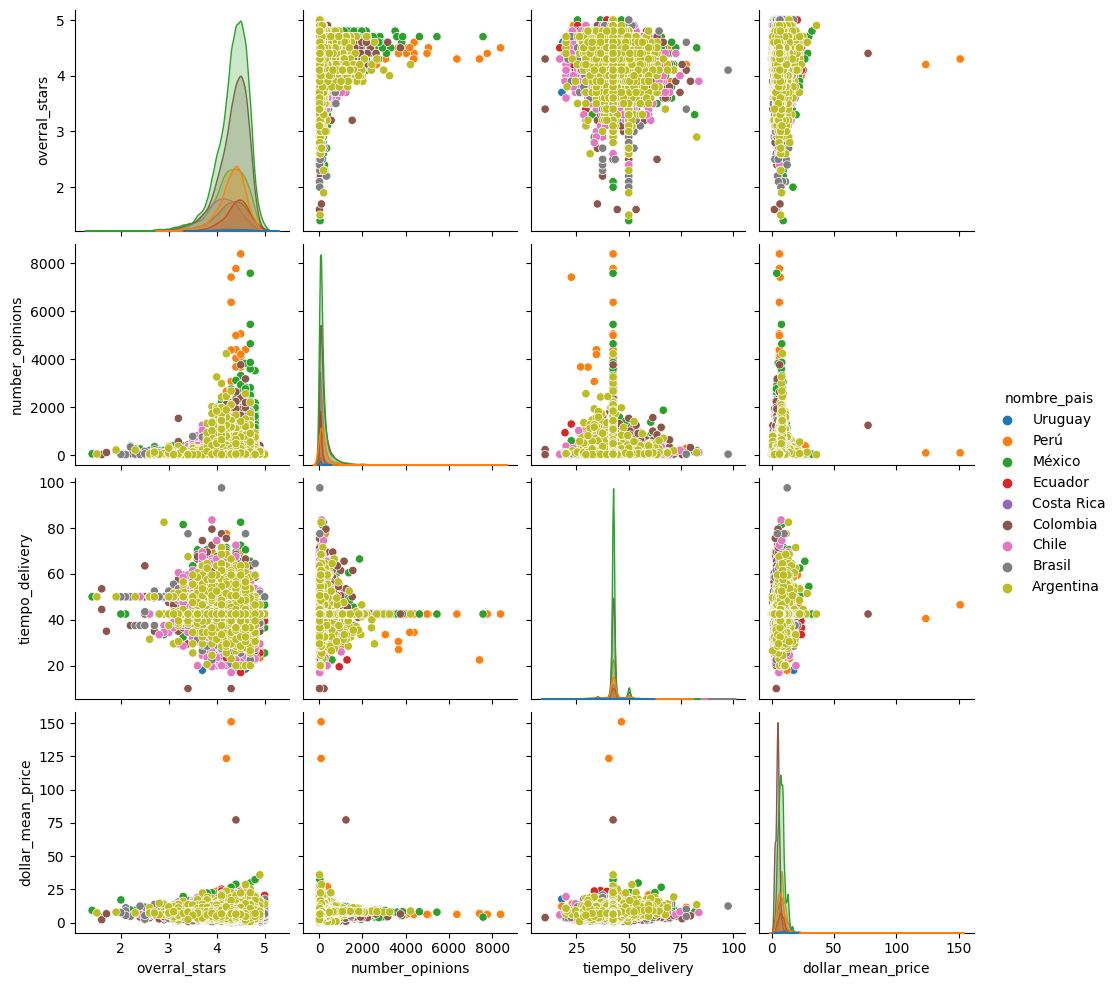

In [56]:
sns.pairplot(
            # Obtenemos solo los datos númericos
            good_atrib_df[['overral_stars', 'number_opinions',
                             'tiempo_delivery', 'dollar_mean_price', "nombre_pais"]],
            # Los clasificamos por país
            hue = "nombre_pais")

Explicar por qué creé la siguiente función

In [ ]:
def give_the_data(df_bruto, list_conditions):
    # Que tenga al menos alguna opinión.
    condicion_1 = df_bruto["number_opinions"] != 0

    # Y se haya podido recopilar su precio promedio
    condicion_2 = df_bruto["dollar_mean_price"] != 0

    # Guardamos este df en otra variable
    df_filtrado = df_bruto[condicion_1 & condicion_2]
    
    # Retonar este df_filtrado
    return df_filtrado

In [57]:
condicion_1 = paises_atrib_df["number_opinions"] != 0

# Y se haya podido recopilar su precio promedio
condicion_2 = paises_atrib_df["dollar_mean_price"] != 0

# Guardamos este df en otra variable
df_filtrado = paises_atrib_df[condicion_1 & condicion_2]

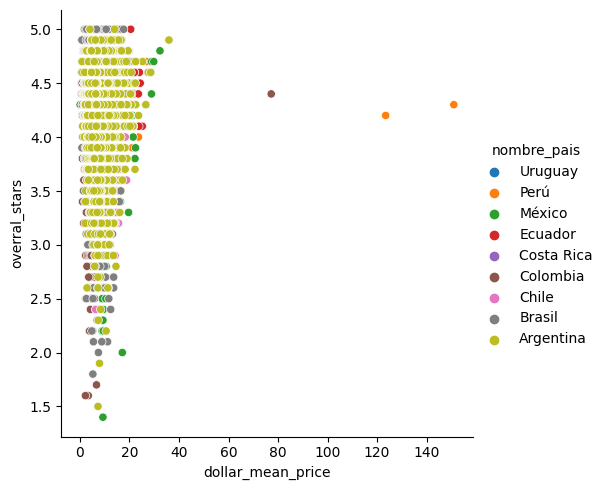

In [58]:
sns.relplot(data=df_filtrado, x="dollar_mean_price", y ="overral_stars", hue="nombre_pais")